In [1]:
import datetime 
from  matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
test=pd.read_csv('Test.csv')

what is inside the 'createdAt' columns of oru dataset

In [2]:
print test.createdAt[0]
type(test.createdAt[0])

2016-08-06T08:26:37.665Z


str

### The literal "Z" is actually part of the ISO 8601 datetime standard for UTC times. When "Z" (Zulu) is tacked on the end of a time, it indicates that that time is UTC, so really the literal Z is part of the time. This probably creates a few problems for the date format library in .NET, since it's actually a literal, rather than a format specifier.

### https://www.tutorialspoint.com/python/time_strptime.htm

 But whot about the milisecond?  we will user the  .%f  for that.

In [3]:
date_object = datetime.datetime.strptime(test.createdAt[0], '%Y-%m-%dT%H:%M:%S.%fZ')
print date_object
type(date_object)

2016-08-06 08:26:37.665000


datetime.datetime

Ok, we van create one datatime object, from one string, now, we should create a new datatime column.

In [4]:
def convert_time(date_string):
    return  datetime.datetime.strptime(date_string, '%Y-%m-%dT%H:%M:%S.%fZ')
test['converted_time']=test.createdAt.apply(convert_time)                                            

Lets check our work:

In [5]:
test['converted_time'][0]
type(test['converted_time'][0])

pandas.tslib.Timestamp

Ow, how cute! The pandas dataframe has implicitly changed our datetime object to his own datetime type. Be aware of it, there ara some differences.  

Lets look at our dates! Matplotlib needs pure unix-timestamps to plot our times ()at least tha implementation i've found on stack-overflow'. So  create a new column for those. 

In [6]:
def create_timestamp(datetime_obj):
    return int(datetime_obj.strftime("%s"))

test['timestamp']= test['converted_time'].apply(create_timestamp)

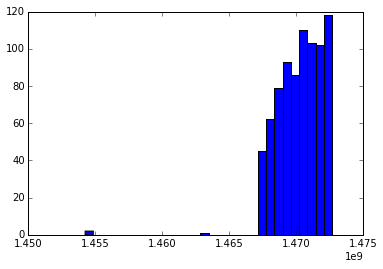

In [7]:
plt.hist(test["timestamp"],bins=30)
plt.show()

The x-axis is not so nice....

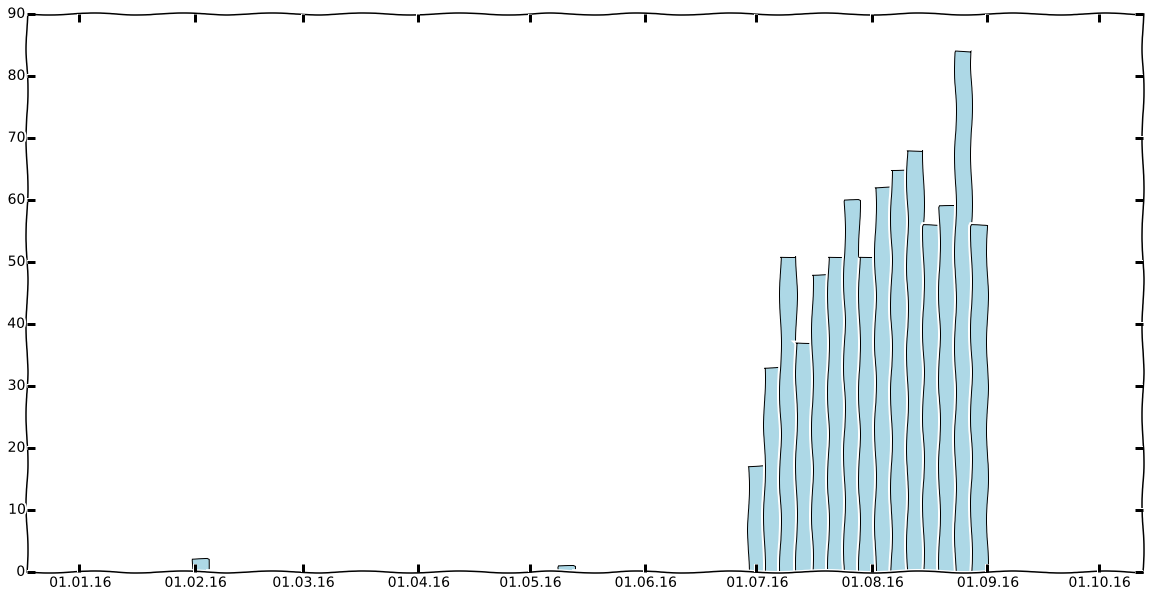

In [11]:
import matplotlib.dates as mdates
timestamp_list= test['timestamp'].tolist()

mpl_data = mdates.epoch2num(timestamp_list)
fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(mpl_data, bins=50, color='lightblue')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.xkcd()
plt.show()


the 'plt.xkcd()' grabs the attention of those who already knew about datetimes
